In [1]:
# importing relevant packages and compiling helper functions
import coi_maps
import submission_analysis.fetch as fetch
import geopandas as gpd
import pandas as pd
from tqdm import tqdm
from typing import Tuple
import coi_final_report as join_text
pd.reset_option("display.max_rows")
pd.reset_option("display.max_colwidth")

In [2]:
# pull down our coi data from our michigan portals 
ids_url = "https://o1siz7rw0c.execute-api.us-east-2.amazonaws.com/beta/submissions/districtr-ids/michigan"
coi_url = "https://o1siz7rw0c.execute-api.us-east-2.amazonaws.com/beta/submissions/csv/michigan?type=coi&length=100000"
coi_df = fetch.coi_submissions(ids_url, coi_url)

In [3]:
# checkout the format of our coi data!
coi_df.head()

,id,title,type,districttype,link,first,last,city,datetime,tags,numberOfComments,text,plan_id,districtr_data
383,38,Dearborn Cultural District,coi,NaN,https://districtr.org/COI/17124,Mary Jo,Durivage,Dearborn City,2021-05-06 00:07:28+00:00,NaN,NaN,Cultural venues in Dearborn. Important that th...,17124,"{'msg': 'Plan successfully found', 'plan': {'a..."
382,39,Dearborn neighborhoods near Ford Field,coi,NaN,https://districtr.org/COI/17128,Mary Jo,Durivage,Dearborn City,2021-05-06 00:18:32+00:00,NaN,NaN,"Area includes residents west of Brady, north o...",17128,"{'msg': 'Plan successfully found', 'plan': {'a..."
364,442,ADA reviews,coi,NaN,https://districtr.org/COI/17892?portal,ADA,eMichigan,NaN,2021-05-28 13:52:04+00:00,NaN,NaN,NaN,17892,"{'msg': 'Plan successfully found', 'plan': {'a..."
384,24,Example: Grand Rapids center and exurbs,coi,NaN,https://districtr.org/COI/17892,Sample Post Only,NaN,Kent County,2021-05-05 17:50:13+00:00,"grand rapids,kent county,city,suburbs",NaN,This map shows the Grand Rapids urban center a...,17892,"{'msg': 'Plan successfully found', 'plan': {'a..."
381,51,Kentwood Public Schools,coi,NaN,https://districtr.org/edit/18093,Scott,Urbanowski,Kentwood,2021-05-06 13:41:45+00:00,"kentwood city,gaines township,kent",NaN,"Home to over 9,000 students, Kentwood Public S...",18093,"{'msg': 'Plan successfully found', 'plan': {'a..."


### ABOUT THE DATA:
# After geographically clustering submissions, we found the following keywords to appear with...
# the highest frequencies within each cluster (for demo purposes, let's look at the UP and ...
# Grand Rapids clusters in michigan). 

# Upper Peninsula:
#     -keywords: tourism, rural, economy, retail
#     -ancilary keywords: retiree, health, logging, minning
    
# Grand Rapids
#     -keywords: class, infastructure, diverse, affordable
#     -ancilary keywords: rental, transit, urban

# We then used these keywords to identify 7 or 8 emergent...
# COIs with the following plan ids that spoke to the relevant keywords
UP_plan_ids = ["20348", "31207", "32661", "29545", "31223", "29749", "30771", "32594"]
GR_plan_ids = ["23972", "26038", "26114", "27185", "29633", "33302", "32419"]
# Filter for the indentified plan ids
UP_subset = join_text.find_coi_subset(coi_df, UP_plan_ids)
GR_subset = join_text.find_coi_subset(coi_df, GR_plan_ids)

In [5]:
# Step 1 in visualizing the data: let's map our assignments to geometries
UP_subset_map = coi_maps.assignment_to_shape(UP_subset)
GR_subset_map = coi_maps.assignment_to_shape(GR_subset)

Projecting into crs 4269
8 submissions using blockgroups
Projecting into crs 4269
7 submissions using blockgroups


In [6]:
##########################################################################################
#                                                                                        #
#                                                                                        #
#                               Upper Peninsula Emergent COIs                            #
#                                                                                        #
#                                                                                        #
##########################################################################################

In [7]:
# some quick cleaning: we flagged the first area of submission 29749 but not the second,...
# so before displaying our heatmap we drop second geographic coi area submitted
UP_dissolved_map = UP_subset_map.dissolve('id')
UP_dissolved_map = UP_dissolved_map.drop("29749-2", axis=0)

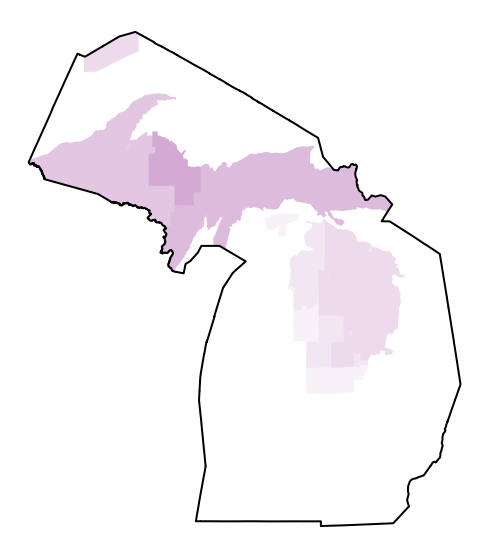

In [8]:
# Plot the heatmap of the UP 
coi_maps.plot_coi_heatmap(UP_dissolved_map, "Michigan")

In [9]:
# UP_subset DataFrame display
cols_to_display = ['title', 'text', 'city', 'link']
pd.set_option("display.max_rows",None,"display.max_colwidth",None)
UP_subset[cols_to_display].head(len(UP_subset))

,title,text,city,link
371,The UP is a Community of Interest,"To state the obvious, the UP is a strong community of interest. We have unique needs, a unique people, and often feel our voice is underrepresented. I would encourage the commission to not treat Michigan's northern district as an ""everything else"" category. Consider that, even though they are in the same district, it takes almost as much time to drive from Ironwood to Traverse City as it does to drive from Detroit to Washington DC.",Chocolay Township,https://districtr.org/edit/20348
290,Districts That Represent Their Peoples,"Map related to my previous comments for the Commission. Thank you for your service!\nThis would be one possible, and compact, mapping for the 1st Congressional District.",Cheboygan,https://districtr.org/COI/29545
269,U.P. counties linked by geography,"The regions of the UP are divided into: Counties on Lake Superior, Counties on Lake Michigan and Counties affiliated with Wisconsin. My personal COI is a liberal-based group in Munising and Marquette that is concerned with diversity, preservation of the Lake Superior shoreline and our tribal communities.","Munising, Alger",https://districtr.org/edit/29749
248,"Powell Twp, Marquette Co, MI","Powell Township is the largest land wise township in the largest county (Marquette) with the smallest population in the county. It literally is ""at the end of the road"" All activity...shopping, doctors, some worship, hospital, high schools, are in the City of Marquette or surrounding area. We are predominantly a recreational community, with service types of business. 2 churches, 2 bars, a community convenient store/gas/cafe, multiple motels, hotel, B &B. The greater developed part of the community is along the County Road 550 that follows the shore of Lake Superior up from Marquette and the area around the inland lake called Lake Independence. We have a County Park, and County Marina in Powell Township. The population is roughly 2200 according to last available census. Population is older with a major portion being retired. We have a K-8 school with average attendance 55.","Powell Township, Marquette County",https://districtr.org/edit/30771
204,Upper Peninsula districting,"The economy, culture, industry, demographics, weather, lifestyle, healthcare and nearly every other metric of the Upper Peninsula is different than downstate Michigan. It would be best for the Upper Peninsula to be one district and Lower Michigan to be divided into two other districts one the northern tier of counties and the other the southern tier of counties for a total of 3 districts statewide.",Alger County,https://districtr.org/edit/31207
201,Northern Michigan,"The communities on this map are of similar interests and share demographics: religion, ethnicity, economics, culture. They are also linked by Central Michigan University in Mt. Pleasant by and through its public TV station. Together, the communities have the approximate population of a congressional district.",Topinabee,https://districtr.org/edit/31223
121,Entire Marquette County,NaN,Ishpeming City,https://districtr.org/edit/32594
117,My (Proposed) US House District,Northern Michigan,Houghton,https://districtr.org/edit/32661


In [10]:
# Now, lets break it down by individual COI area, not just by individual submission
cols_to_display = ['title', 'text', 'city', 'link', 'area_text', 'area_name', 'num_areas']
UP_joined = join_text.join_area_text(UP_subset)
UP_joined[cols_to_display].head(len(UP_joined))

,title,text,city,link,area_text,area_name,num_areas
371,The UP is a Community of Interest,"To state the obvious, the UP is a strong community of interest. We have unique needs, a unique people, and often feel our voice is underrepresented. I would encourage the commission to not treat Michigan's northern district as an ""everything else"" category. Consider that, even though they are in the same district, it takes almost as much time to drive from Ironwood to Traverse City as it does to drive from Detroit to Washington DC.",Chocolay Township,https://districtr.org/edit/20348,,Michigan's UP,1
290,Districts That Represent Their Peoples,"Map related to my previous comments for the Commission. Thank you for your service!\nThis would be one possible, and compact, mapping for the 1st Congressional District.",Cheboygan,https://districtr.org/COI/29545,"Mostly rural in character, with the exception of a few larger cities such as Marquette, Escanaba, and S.S. Marie. Southern counties could go to another Congressional district as needed, to keep districts compact.",Upper Peninsula and Northern Lower,1
204,Upper Peninsula districting,"The economy, culture, industry, demographics, weather, lifestyle, healthcare and nearly every other metric of the Upper Peninsula is different than downstate Michigan. It would be best for the Upper Peninsula to be one district and Lower Michigan to be divided into two other districts one the northern tier of counties and the other the southern tier of counties for a total of 3 districts statewide.",Alger County,https://districtr.org/edit/31207,The Upper Peninsula region of Michigan is a unique cultural and economic region of Michigan and as such has particular concerns distinct from elsewhere in Michigan or the US.,Community 1,1
201,Northern Michigan,"The communities on this map are of similar interests and share demographics: religion, ethnicity, economics, culture. They are also linked by Central Michigan University in Mt. Pleasant by and through its public TV station. Together, the communities have the approximate population of a congressional district.",Topinabee,https://districtr.org/edit/31223,,Community 1,1
121,Entire Marquette County,NaN,Ishpeming City,https://districtr.org/edit/32594,,Community 1,1
117,My (Proposed) US House District,Northern Michigan,Houghton,https://districtr.org/edit/32661,,US House District,1
269,U.P. counties linked by geography,"The regions of the UP are divided into: Counties on Lake Superior, Counties on Lake Michigan and Counties affiliated with Wisconsin. My personal COI is a liberal-based group in Munising and Marquette that is concerned with diversity, preservation of the Lake Superior shoreline and our tribal communities.","Munising, Alger",https://districtr.org/edit/29749,These are the counties along Lake Superior,Community 1,3
269,U.P. counties linked by geography,"The regions of the UP are divided into: Counties on Lake Superior, Counties on Lake Michigan and Counties affiliated with Wisconsin. My personal COI is a liberal-based group in Munising and Marquette that is concerned with diversity, preservation of the Lake Superior shoreline and our tribal communities.","Munising, Alger",https://districtr.org/edit/29749,Counties along Lake Michigan,Community 2,3
269,U.P. counties linked by geography,"The regions of the UP are divided into: Counties on Lake Superior, Counties on Lake Michigan and Counties affiliated with Wisconsin. My personal COI is a liberal-based group in Munising and Marquette that is concerned with diversity, preservation of the Lake Superior shoreline and our tribal communities.","Munising, Alger",https://districtr.org/edit/29749,Counties affiliated with Wisconsin,Community 3,3
248,"Powell Twp, Marquette Co, MI","Powell Township is the largest land wise township in the largest county (Marquette) with the smallest population in the county. It literally is ""at the end of the road"" All activity...shopping, doctors, some worship, hospital, high schools

In [11]:
##########################################################################################
#                                                                                        #
#                                                                                        #
#                                Grand Rapids Emergent COIs                              #
#                                                                                        #
#                                                                                        #
##########################################################################################

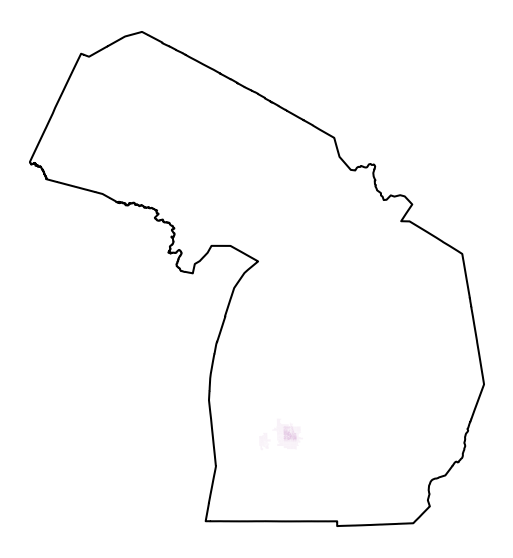

In [12]:
# Plot the heatmap of the UP 
coi_maps.plot_coi_heatmap(GR_subset_map, "Michigan")

In [13]:
# UP_subset DataFrame display
cols_to_display = ['title', 'text', 'city', 'link']
pd.set_option("display.max_rows",None,"display.max_colwidth",None)
GR_subset[cols_to_display].head(len(GR_subset))

,title,text,city,link
344,Southern Grand Rapids Metropolitan Area,"My name is Charlie and I live in Grand Rapids, Michigan. My Community of Interest is called the Southern Grand Rapids Metropolitan Area. \n\nI’m asking the commission to draw districts that keep our community intact! \n\nWe are compromised of the southern half of Grand Rapids, and the entire cities of Wyoming, and Kentwood. There are roughly 200,000 residents in our community of interest. \n\nThe City of Wyoming Vision statement perfectly summarizes the character of our community, “A diverse, strong, and authentic community where all individuals have the opportunity to thrive.” \n\nIf you find yourself in town, I hope you’ll visit the Beltine Bar for the world famous wet burrito! \n\nHistorically, our Community has been a mix of working classes suburbs, but we are quickly urbanizing and growing. In fact, we are the fasting growing area in Kent County. \n\nThe rapid growth of our community requires representation that understands the issues and challenges we face. Our top issues include, affordable housing, environmental clean up, and improving reliable mass transit.\n\nThe cost of housing is going up quickly. In fact, my rent has increased 5% in this past year alone. As for the health and safety of our community, we have half of Kent county’s federal superfund cleanup sites, even though we represent only 1/4 of the county population. \n\nFor a community of 200,000, it is frustrating that we were split apart by the 2011 district maps. Currently, we are in two congressional districts, 3 State Senate Districts, and 5 State House Districts. \n\nWe deserve to be represented by 1 congressional district, 2 state house districts, and 1 state senate district. \nThis commission can help the Southern Grand Rapids Metropolitan Community of Interest by drawing district lines that keep our community whole.","Grand Rapids, Kent County",https://districtr.org/COI/23972
321,Holland/West Ottawa School Dist. Parents,"This community is made up of parents in the Holland and West Ottawa School Districts. Both school districts have a fair percentage of minority students and students receiving free and reduced-price school meals. Right now, these parents have to talk to 2 Michigan House Representatives/district and their influence is diminished when they try to lobby their representatives. They should all be part of one district and if House District 90 went all the way west to Lake Michigan, while not extending as far east, that would put most of both districts under one Michigan House seat.",Holland,https://districtr.org/COI/26038
319,Kent County Core 6 Cities,"In Kent County there are 6 core metro cities. These are Grand Rapids, Walker, Grandville, Wyoming, Kentwood, and East Grand Rapids. They are a clear community of interest based on shared services and similar forms of government. The 6 cities have several unique partnerships that they do together and not with outlying townships. The most well known is that they share the Rapid Transit System. They also partner together to send all their garbage to the incinerator which burns garbage to produce energy. This is the only incinerator that remains in use in Michigan. Many of the 6 cities also partner with the city of Grand Rapids on water and sewer, such as Kentwood, East Grand Rapids, and Walker. The 6 cities also share a form of government that is dramatically different than surrounding townships. Cities have their own police departments, fire departments, park systems, and they take care of their own streets. To the contrary, townships rely on county services such as the county sheriff, volunteer fire departments, the county park systems, the county road commission, and they deliver fewer services because they are restricted to 5 mils of taxes. However you draw districts for State House, State Senate, and Congress. Please keep the 6 cities together as much as possible.\n",Grand Rapids City,https://districtr.org/edit/26114
305,Six

In [14]:
# Now, lets break it down by individual COI area, not just by individual submission
cols_to_display = ['title', 'text', 'city', 'link', 'area_text', 'area_name', 'num_areas']
GR_joined = join_text.join_area_text(GR_subset)
GR_joined[cols_to_display].head(len(GR_joined))

,title,text,city,link,area_text,area_name,num_areas
344,Southern Grand Rapids Metropolitan Area,"My name is Charlie and I live in Grand Rapids, Michigan. My Community of Interest is called the Southern Grand Rapids Metropolitan Area. \n\nI’m asking the commission to draw districts that keep our community intact! \n\nWe are compromised of the southern half of Grand Rapids, and the entire cities of Wyoming, and Kentwood. There are roughly 200,000 residents in our community of interest. \n\nThe City of Wyoming Vision statement perfectly summarizes the character of our community, “A diverse, strong, and authentic community where all individuals have the opportunity to thrive.” \n\nIf you find yourself in town, I hope you’ll visit the Beltine Bar for the world famous wet burrito! \n\nHistorically, our Community has been a mix of working classes suburbs, but we are quickly urbanizing and growing. In fact, we are the fasting growing area in Kent County. \n\nThe rapid growth of our community requires representation that understands the issues and challenges we face. Our top issues include, affordable housing, environmental clean up, and improving reliable mass transit.\n\nThe cost of housing is going up quickly. In fact, my rent has increased 5% in this past year alone. As for the health and safety of our community, we have half of Kent county’s federal superfund cleanup sites, even though we represent only 1/4 of the county population. \n\nFor a community of 200,000, it is frustrating that we were split apart by the 2011 district maps. Currently, we are in two congressional districts, 3 State Senate Districts, and 5 State House Districts. \n\nWe deserve to be represented by 1 congressional district, 2 state house districts, and 1 state senate district. \nThis commission can help the Southern Grand Rapids Metropolitan Community of Interest by drawing district lines that keep our community whole.","Grand Rapids, Kent County",https://districtr.org/COI/23972,"My name is Charlie and I live in Grand Rapids, Michigan. My Community of Interest is called the Southern Grand Rapids Metropolitan Area. \n\nI’m asking the commission to draw districts that keep our community intact! \n\nWe are compromised of the southern half of Grand Rapids, and the entire cities of Wyoming, and Kentwood. There are roughly 200,000 residents in our community of interest. \n\nThe City of Wyoming Vision statement perfectly summarizes the character of our community, “A diverse, strong, and authentic community where all individuals have the opportunity to thrive.” \n\nIf you find yourself in town, I hope you’ll visit the Beltine Bar for the world famous wet burrito! \n\nHistorically, our Community has been a mix of working classes suburbs, but we are quickly urbanizing and growing. In fact, we are the fasting growing area in Kent County. \n\nThe rapid growth of our community requires representation that understands the issues and challenges we face. Our top issues include, affordable housing, environmental clean up, and improving reliable mass transit.\n\nThe cost of housing is going up quickly. In fact, my rent has increased 5% in this past year alone. As for the health and safety of our community, we have half of Kent county’s federal superfund cleanup sites, even though we represent only 1/4 of the county population. \n\nFor a community of 200,000, it is frustrating that we were split apart by the 2011 district maps. Currently, we are in two congressional districts, 3 State Senate Districts, and 5 State House Districts. \n\nWe deserve to be represented by 1 congressional district, 2 state house districts, and 1 state senate district. \nThis commission can help the Southern Grand Rapids Metropolitan Community of Interest by drawing district lines that keep our community whole.",Southern Grand Rapids Metropolitan Area COI,1
321,Holland/West Ottawa School Dist. Parents,"This community is made up of parents in the Holland and West Ottawa School Districts. Both school di